In [1]:
# Titanic Kaggle Challenge, voor het voorspellen van overlevingskansen op de Titanic voor het vak AI Essentials
# Islam Chamelev, student Dig-X

In [2]:
# Importeren libraries
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
#Data laden uit Seaborn Titanic dataset
titanic = sns.load_dataset('titanic')

#Print de eerste 10 rijen
titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [4]:
#Totaal van rijen en kolommen in de dataset
titanic.shape

(891, 15)

In [5]:
#Statistieken
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
#Aantal overlevende passagiers (0 is overleden, 1 is levend)
titanic['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

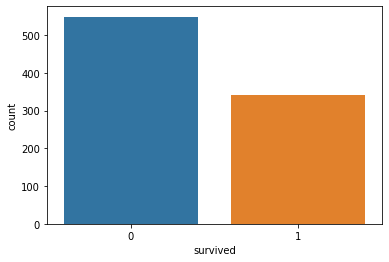

In [7]:
#Visualisatie van de overlevers
sns.countplot(titanic['survived'])

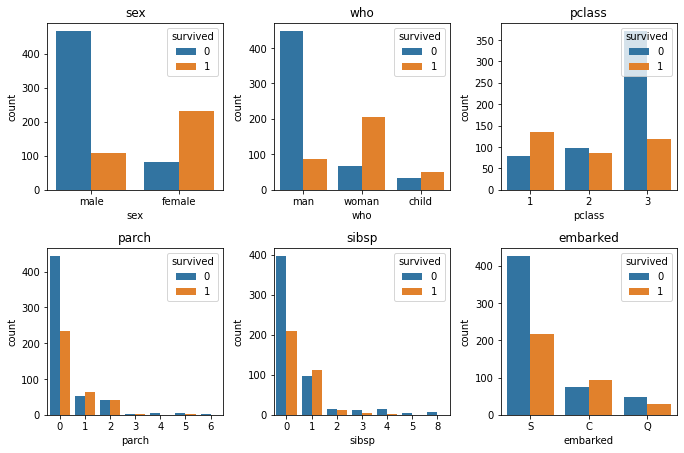

In [8]:
# Visualisatie van overlevers voor de kolommen 'sex', 'who', 'pclass', 'parch', 'sibsp',  and 'embarked'
cols = ['sex','who',  'pclass', 'parch','sibsp',  'embarked']
n_rows = 2
n_cols = 3

fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols*3.2,n_rows*3.2))

for r in range(0,n_rows):
    for c in range(0,n_cols):  
        i = r*n_cols+ c    
        ax = axs[r][c] 
        sns.countplot(titanic[cols[i]], hue=titanic["survived"], ax=ax)
        ax.set_title(cols[i])
        ax.legend(title="survived", loc='upper right') 
        
plt.tight_layout()   

In [9]:
#Overlevingskans geslacht
titanic.groupby('sex')[['survived']].mean()

,survived
sex,
female,0.742038
male,0.188908


In [10]:
#Overlevingskans geslacht + klasse
titanic.pivot_table('survived', index='sex', columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


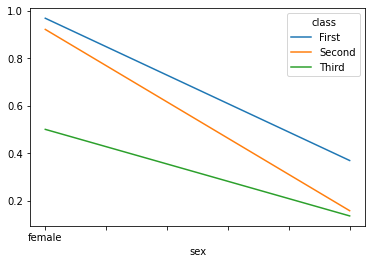

In [11]:
#Grafiek geslacht + klasse overlevingskans
titanic.pivot_table('survived', index='sex', columns='class').plot()

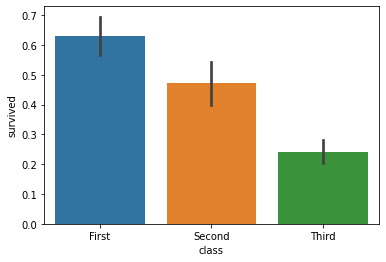

In [12]:
#Visueel weergeven overlevingskans per klasse
sns.barplot(x='class', y='survived', data = titanic)

In [13]:
#Overlevingskans geslacht, klasse en leeftijd
age = pd.cut(titanic['age'], [0, 18, 80])
titanic.pivot_table('survived', ['sex', age], 'class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

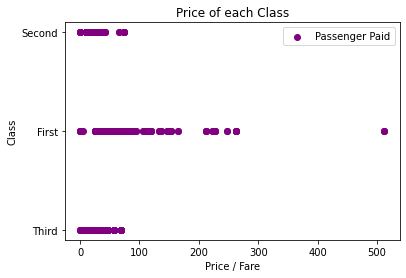

In [14]:
# Scatterplot van de ticketprijzen per klasse
plt.scatter(titanic['fare'], titanic['class'], color= 'purple', label='Passenger Paid')
plt.ylabel('Class')
plt.xlabel('Price / Fare')
plt.title('Price of each Class')
plt.legend()
plt.show()

In [15]:
#Som van alle lege waardes per kolom
titanic.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [16]:
#Alle waardes uit de kolommen optellen en een opsomming verkrijgen
for val in titanic:
  print(titanic[val].value_counts())
  print()

0    549
1    342
Name: survived, dtype: int64

3    491
1    216
2    184
Name: pclass, dtype: int64

male      577
female    314
Name: sex, dtype: int64

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: age, Length: 88, dtype: int64

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: sibsp, dtype: int64

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: parch, dtype: int64

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
8.4583      1
9.8375      1
8.3625      1
14.1083     1
17.4000     1
Name: fare, Length: 248, dtype: int64

S    644
C    168
Q     77
Name: embarked, dtype: int64

Third     491
First     216
Second    184
Name: class, dtype: int64

man      537
woman    271
child     83
Name: who, dtype: int64

True     537
False    354
Name: adult_male, dtype: int64

C    59
B    47
D    33
E    32
A    15
F    13
G     

In [17]:
# Kolommen laten vallen dat duplicaat/redundant zijn
titanic = titanic.drop(['deck', 'embark_town', 'alive', 'class', 'alone', 'adult_male', 'who'], axis=1)

# Alle rijen laten vallen dat waardes ontbreken bij embarked en age
titanic = titanic.dropna(subset =['embarked', 'age'])

In [18]:
# Nieuwe dataset weergeven
titanic.shape

(712, 8)

In [19]:
# Data typen weergeven
titanic.dtypes

survived      int64
pclass        int64
sex          object
age         float64
sibsp         int64
parch         int64
fare        float64
embarked     object
dtype: object

In [20]:
# Data typen uitprinten met object waarden
print(titanic['sex'].unique())
print(titanic['embarked'].unique())

['male' 'female']
['S' 'C' 'Q']


In [21]:
# Omvormen naar numerieke waarden
from sklearn.preprocessing import LabelEncoder
labelencoder= LabelEncoder()

#Geslacht kolom encoderen
titanic.iloc[:, 2] = labelencoder.fit_transform (titanic.iloc[:, 2].values)

#Embarked kolom encoderen
titanic.iloc[:,7]= labelencoder.fit_transform(titanic.iloc[:,7].values)

# Weergeven van nieuwe waardes
print(titanic['sex'].unique())
print(titanic['embarked'].unique())

[1 0]
[2 0 1]


In [22]:
titanic.dtypes

survived      int64
pclass        int64
sex           int64
age         float64
sibsp         int64
parch         int64
fare        float64
embarked      int64
dtype: object

In [23]:
#Splitsen van data in independant X en dependant Y variabelen
X = titanic.iloc[:, 1:8].values 
Y = titanic.iloc[:, 0].values 

In [24]:
# Splitsen van de data 80% Training en 20% Testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [25]:
#Feature Scaling om meer accurate berekening te verkrijgen
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [26]:
#Training van ML models
def models(X_train,Y_train):
  
  #Logistic Regression
  from sklearn.linear_model import LogisticRegression
  log = LogisticRegression(random_state = 0)
  log.fit(X_train, Y_train)
  
  #KNeighborsClassifier
  from sklearn.neighbors import KNeighborsClassifier
  knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
  knn.fit(X_train, Y_train)

  #Support Vector Machine (Linear Classifier)
  from sklearn.svm import SVC
  svc_lin = SVC(kernel = 'linear', random_state = 0)
  svc_lin.fit(X_train, Y_train)

  #Support Vector Machine (RBF Classifier)
  from sklearn.svm import SVC
  svc_rbf = SVC(kernel = 'rbf', random_state = 0)
  svc_rbf.fit(X_train, Y_train)

  #Gaussian Naive Bayes 
  from sklearn.naive_bayes import GaussianNB
  gauss = GaussianNB()
  gauss.fit(X_train, Y_train)

  #Decision Tree Classifier
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
  tree.fit(X_train, Y_train)

  #Random Forest Classifier
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
  forest.fit(X_train, Y_train)
  
  #Weergeven nauwkeurigheid modellen op training data
  print('Logistic Regression:', log.score(X_train, Y_train))
  print('K Nearest Neighbor:', knn.score(X_train, Y_train))
  print('Support Vector Machine (Linear Classifier):', svc_lin.score(X_train, Y_train))
  print('Support Vector Machine (RBF Classifier):', svc_rbf.score(X_train, Y_train))
  print('Gaussian Naive Bayes:', gauss.score(X_train, Y_train))
  print('Decision Tree Classifier:', tree.score(X_train, Y_train))
  print('Random Forest Classifier:', forest.score(X_train, Y_train))
  
  return log, knn, svc_lin, svc_rbf, gauss, tree, forest

In [27]:
#Trainen van modellen
model = models(X_train,Y_train)

Logistic Regression: 0.7978910369068541
K Nearest Neighbor: 0.8664323374340949
Support Vector Machine (Linear Classifier): 0.7768014059753954
Support Vector Machine (RBF Classifier): 0.8506151142355008
Gaussian Naive Bayes: 0.8031634446397188
Decision Tree Classifier: 0.9929701230228472
Random Forest Classifier: 0.9753954305799648


In [28]:
#Confusion matrix en nauwkeurigheid modellen weergeven voor de testing data

from sklearn.metrics import confusion_matrix 

for i in range(len(model)):
  cm = confusion_matrix(Y_test, model[i].predict(X_test)) 

  TN, FP, FN, TP = confusion_matrix(Y_test, model[i].predict(X_test)).ravel()
  print(cm)
  print('Model[{}] Testing Accuracy = "{}"'.format(i,  (TP + TN) / (TP + TN + FN + FP)))
  print()

[[73  9]
 [18 43]]
Model[0] Testing Accuracy = "0.8111888111888111"

[[71 11]
 [20 41]]
Model[1] Testing Accuracy = "0.7832167832167832"

[[70 12]
 [18 43]]
Model[2] Testing Accuracy = "0.7902097902097902"

[[75  7]
 [22 39]]
Model[3] Testing Accuracy = "0.7972027972027972"

[[69 13]
 [23 38]]
Model[4] Testing Accuracy = "0.7482517482517482"

[[60 22]
 [10 51]]
Model[5] Testing Accuracy = "0.7762237762237763"

[[67 15]
 [13 48]]
Model[6] Testing Accuracy = "0.8041958041958042"



In [29]:
#Importance van de features verkrijgen
forest = model[6]
importances = pd.DataFrame({'feature':titanic.iloc[:, 1:8].columns,'importance':np.round(forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

,importance
feature,
age,0.300
fare,0.296
sex,0.183
pclass,0.098
sibsp,0.050
parch,0.044
embarked,0.030


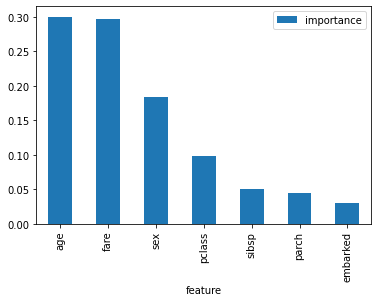

In [30]:
#Visualiseren van de importance
importances.plot.bar()


In [31]:
#Voorspelling van Random Forest Classifier model weergeven
pred = model[6].predict(X_test)
print(pred)
print()

#Originele waardes
print(Y_test)

[1 1 1 0 0 0 1 0 0 1 1 1 1 0 0 1 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1
 1 1 0 0 0 1 0 1 0 1 0 0 1 1 0 1 0 1 0 0 1 1 1 0 0 0 1 0 0 1 0 1 1 1 1 1 1
 0 0 1 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 1
 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 1]

[0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1
 1 1 1 1 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 0 1 1 1
 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0
 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 1]


In [32]:
#Voorspelling overlevingskansen van mijzelf
my_survival = [[1,1,24,0, 0, 0, 1]]
pred = model[6].predict(my_survival)
print(pred)

if pred == 0:
  print('Je hebt het niet overleefd.')
else:
  print('Je hebt het overleefd!')

[0]
Je hebt het niet overleefd.
